In [22]:
import numpy as np


Artificial Neural Networks

Implementar una Red Neuronal Artificial Multiclase para la clasificación de imágenes de dígitos  del 0 al 9 escritos a mano (handwriting digit recognition).


In [1]:
!pip install --upgrade gdown

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.23.2-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
!gdown --id 1x0JbCKDCGtynM6GnunAOdDYlyt7dI0B- -O mnist.txt

/home/dayan3847/.local/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1x0JbCKDCGtynM6GnunAOdDYlyt7dI0B-
To: /home/dayan3847/PycharmProjects/machine_learning/1_3_multi_layer_perceptron/src/v2/mnist.txt
100%|██████████████████████████████████████| 9.13M/9.13M [00:00<00:00, 9.70MB/s]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # Características (pixeles)
    y = data[:, -1]  # Etiquetas (clase)
    return X, y

In [5]:
def visualize_image(images, labels, n):
    if n >= len(images):
        print("El índice n está fuera del rango.")
        return
    image = images[n].reshape(28, 28)  # reconstruye la imagen en una matriz de 28x28
    label = int(labels[n])

    plt.imshow(image, cmap='gray')
    plt.title(f"Imagen del dígito: {label} índice:{n}")
    plt.axis('off')
    plt.show()

In [6]:
# Cargar los datos
file_path = "mnist.txt"
images, labels = load_data(file_path)
print(len(images))
print(len(labels))

5000
5000


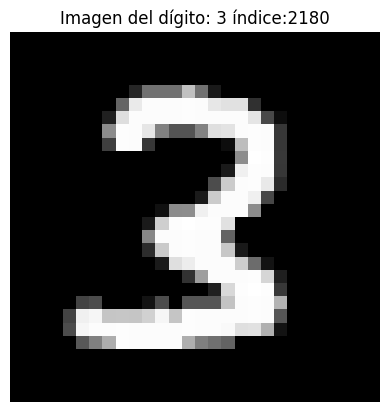

In [15]:
# Visualizar la imagen en la posición n
import random

n = random.randint(0, 5000)
visualize_image(images, labels, n)

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = images[:900], images[900:]
y_train, y_test = labels[:900], labels[900:]

# Normalizar los datos
X_train /= 255.0
X_test /= 255.0

In [12]:
print(X_train.shape)
print(y_train.shape)

(900, 784)
(900,)


In [18]:
a: float = 0.1

topology = [784, 512, 10]

w1 = np.random.rand(topology[0] + 1, topology[1])


def propagate_w1(input_: np.array):
    return np.append(input_ @ w1, 1)


w2 = np.random.rand(topology[1] + 1, topology[2])


def propagate_w2(input_: np.array):
    return input_ @ w2


def propagate(input_: np.array):
    # return propagate_w2(propagate_w1(input_))
    return np.append(input_ @ w1, 1) @ w2

In [19]:
def retro_propagate(x: np.array, y: np.array):
    global w1, w2
    o1 = np.append(x @ w1, 1)
    print('o1', o1.shape)
    o2 = o1 @ w2
    d2 = np.multiply(o2, np.multiply(1 - o2, y - o2))
    # output neuron:
    w2 += a * np.outer(o1, d2)
    # hidden neuron:
    wdwdwd = []
    for i in range(w2.shape[0]):
        wd_i = 0
        for j in range(w2.shape[1]):
            wd_i += w2[i, j] * d2[j]
        wdwdwd.append(wd_i)
    print('wdwdwd', np.array(wdwdwd).shape)
    print('1 - o1', (1 - o1).shape)
    print('np.array(wdwdwd)', np.array(wdwdwd))

    qwe = np.multiply(1 - o1, np.array(wdwdwd))
    print('qwe', qwe.shape)
    d1 = np.multiply(o1, qwe)
    d1 = d1[0:-1]
    print('d1', d1.shape)
    w1 += a * np.outer(x, d1)

In [24]:
y_train[0]

5.0

In [25]:
retro_propagate(np.append(X_train[0], 1), np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]))

o1 (513,)
wdwdwd (513,)
1 - o1 (513,)
np.array(wdwdwd) [           -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf   

/tmp/ipykernel_1198699/3415998143.py:14: RuntimeWarning: overflow encountered in double_scalars
  wd_i += w2[i, j] * d2[j]
/home/dayan3847/.local/lib/python3.10/site-packages/numpy/core/numeric.py:942: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
